<a href="https://colab.research.google.com/github/Rami-RK/Transfer_Learning_CV/blob/main/vgg19_for_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### * Google Colab Implementation @ Ramendra Kumar
#### * Built in VGG19 from Keras API with pretrained weight are used for prediction of a given image by user. No Training.
#### * Upload in your colab and run as it is,no change is required. Have Fun recognizing different images.


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19


In [ ]:
# load the model
model = VGG19()

### Uploading, Displaying & Preprocessing the image from local system

Saving tiger.jpg to tiger (1).jpg


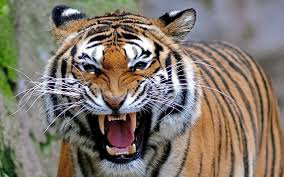

In [ ]:
from PIL import Image
import numpy as np
from google.colab import files
uploaded = files.upload()
path=list(uploaded.keys())[0]
# Displaying the uploaded image
image = Image.open(path)
img_raw=np.array(image)
display(Image.fromarray(img_raw, 'RGB')) # Display the image


In [ ]:
# Preprocessing the image as required by model loading it into Keras :
image = load_img(path, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)


### Uploading, Displaying  and Preprocessing the image from from URL

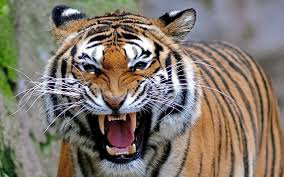

In [ ]:
# Read image from github
import requests
import io
url = "https://raw.githubusercontent.com/Rami-RK/"\
"Transfer_Learning_CV/main/tiger.jpg"
response = requests.get(url)
img= Image.open(io.BytesIO(response.content)).convert('RGB')
display(img)



In [ ]:
# Preprocessing the image as required by model, loading it into Keras :
img = img.resize((224, 224))
image= np.array(img)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)


### Note: Uplaod image to be predicted using any one method as given above.
### Prediction Part, give below remains same for both method. 

### Predicting the image  with probabiltiy

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

tiger (80.79%)
